## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Questions to reflect on when we complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?






1. **Stakeholders for the Project:**
   - The stakeholders for this project would include:
      - Senior leadership team at Salifort Motors who initiated the project.
      - Human Resources (HR) department responsible for employee retention.
      - Data Science team, including me, as the key contributors to the project.

2. **Objective of the Project:**
   - The main goal is to increase employee retention at Salifort Motors. Specifically, am tasked with analyzing the results of the employee survey to design a model that predicts whether an employee will leave the company. This predictive model can then be used to implement targeted strategies for employee retention.

3. **Initial Data Observations:**
   - Before providing specific observations, it's important to explore the data to understand its characteristics. Potential observations could include:
      - The distribution of employees across different departments.
      - The range and distribution of the number of projects and average monthly hours.
      - Any patterns or trends in the data that might be indicative of factors affecting employee retention.

4. **Resources Used in this Stage:**
   - During the exploration stage, common resources include:
      - Jupyter Notebooks or other data analysis tools for exploring and visualizing data.
      - Python libraries such as Pandas, NumPy, and Matplotlib/Seaborn for data manipulation and visualization.
      - Scikit-learn for building and evaluating machine learning models.
      - Links to relevant documentation:
         - [Jupyter Notebooks](https://jupyter.org/)
         - [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
         - [NumPy Documentation](https://numpy.org/doc/stable/)
         - [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
         - [Seaborn Documentation](https://seaborn.pydata.org/)
         - [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)

5. **Ethical Considerations:**
   - When working with employee data, it's crucial to prioritize privacy and confidentiality. Ensure that you comply with data protection regulations and company policies. Additionally, be transparent about the purpose of data analysis and how the results will be used. Avoid any discriminatory practices and biases in the model, and consider the ethical implications of using the predictions for employee-related decisions.



## Step 1. Imports: ETL  and Data Preprocessing


*   Import packages
*   Load dataset



### Import packages

In [53]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd
from tabulate import tabulate
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# for statistics testisting 
import statsmodels.api as smi
# For data modeling
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# For metrics and helpful functions
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
# For saving models
import pickle


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
# For displaying all of the columns in dataframe
pd.set_option('display.max_columns', None)
#setting option of seaborn for more graphique clarity
sns.set(style='darkgrid')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [55]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")
# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [56]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- **We observe that there are no missing data, which will be verified separately later. Additionally, it is noteworthy that only the 'Department' and 'Salary' columns are of type 'object'; all other columns are numerical. The shape of our dataset is 14,999 rows and 10 columns. Furthermore, it is evident that some variables are poorly named.**

### Gather descriptive statistics about the data

In [57]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [58]:
# Display all column names

df0.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [59]:
# Rename columns as needed

df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update

df0.columns.to_list()


['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'tenure',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

### Check missing values

Check for any missing values in the data.

In [60]:
# Check for missing values in %
df0.isna().sum()/df0.shape[0]*100

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_monthly_hours    0.0
tenure                   0.0
work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

- No missing values were identified, as observed earlier.

### Check duplicates

Check for any duplicate entries in the data.

In [61]:
# Check for duplicates
df0.duplicated().sum()

3008

- 3,008 rows contain duplicates. almost 20% of the data.

In [62]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

It seems highly improbable that these duplicated rows represent legitimate entries. The presence of 3,008 rows with duplicates, accounting for almost 20% of the data, raises significant concerns about the credibility of these observations. It is highly unlikely that two employees independently and accurately self-reported the exact same responses for every column, especially given the diverse nature of the data, including satisfaction level, last evaluation, number of projects, average monthly hours, and other relevant factors.

The duplication of such a substantial portion of the dataset suggests potential errors, artifacts, or systematic issues in data collection or recording. Further investigation into the source of these duplicates is essential to ensure the integrity of the dataset. Addressing this issue is crucial before proceeding with any analysis or model development, as relying on duplicated and potentially erroneous data may lead to inaccurate results and flawed insights.
we can proceed by dropping them.

In [63]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
print(f'dataset shape:   {df1.shape}')
df1.head()

dataset shape:   (11991, 10)


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

In [64]:
#saving the cleaned dataset for any further use
df1.to_csv('cleaned_HR_capstone_dataset.csv')

### Check outliers

Check for outliers column tenure.

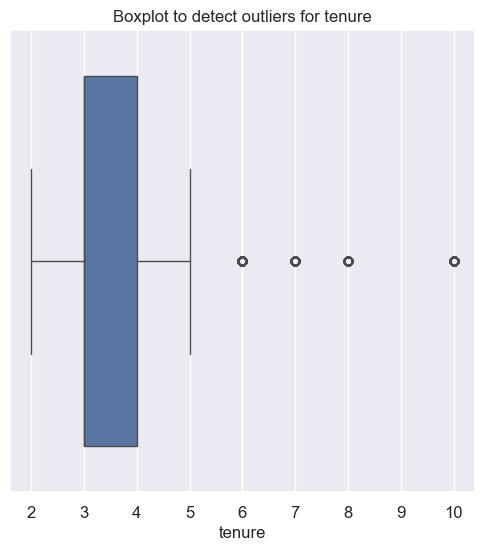

In [65]:
 #Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()


**Summary: Outlier Treatment**
During our data exploration, we identified outliers in the 'tenure' variable, which represents the time an employee has spent with the company. 
The presented boxplot indicates the presence of outliers within the 'tenure' variable, suggesting potential anomalies or extreme values in the distribution.

To gain a deeper understanding of the impact of these outliers, it is essential to conduct a thorough investigation to determine the number of rows in the dataset that contain outlier values within the 'tenure' column. This exploration will provide insights into the extent of the outliers' influence on the overall dataset and enable a more informed decision-making process in subsequent analysis and modeling stages.

a method of determining the outliers is by passing through the quantiles by setting a maximum limit and a minimum limit.
an example is the following:

In [66]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Various models demonstrate differing levels of sensitivity to outliers, necessitating a thoughtful approach as we advance to the model-building stage. We will assess the influence of outliers on our chosen model and make a decision on whether to remove them, taking into account the specific characteristics and tolerances of the model type we opt for. This consideration is crucial as outlier handling can significantly impact the model's overall performance and reliability in making predictions.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



**1. Relationships Between Variables:**
   - The box plots and count plots revealed insights into the relationships between variables and their distribution concerning the target variable ('left'). For example, 'satisfaction_level' and 'average_monthly_hours' exhibited distinct patterns for employees who left compared to those who stayed.

**2. Distributions in the Data:**
   - The distributions varied across different variables. 'Satisfaction_level' had a bimodal distribution, and 'average_monthly_hours' showed a relatively normal distribution. Understanding these distributions is crucial for selecting appropriate models and features in predictive modeling.

**3. Data Transformations:**
   - We focused on addressing outliers in the 'tenure' variable due to its relevance to the study, opting not to treat outliers in 'number_project' as it was deemed non-influential. This decision ensures that our predictive model emphasizes factors directly linked to employee retention.

**4. Purposes of EDA Before Constructing a Predictive Model:**
   - EDA (Exploratory Data Analysis) serves several key purposes:
      - Identifying patterns, trends, and relationships between variables.
      - Understanding the distribution of individual features and the target variable.
      - Recognizing potential outliers and deciding on appropriate treatments.
      - Informing feature selection and model choices based on data characteristics.
      - Ensuring the data's suitability for the chosen predictive modeling approach.

**5. Resources Used:**
   - Resources utilized during this stage include:
      - Seaborn and Matplotlib for data visualization: [Seaborn Documentation](https://seaborn.pydata.org/), [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
      - Pandas for data manipulation: [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

**6. Ethical Considerations:**
   - Ethical considerations in this stage involve ensuring data privacy, transparency, and fairness. Handling employee data requires compliance with data protection regulations, and transparency in data analysis methodologies is essential. Avoiding biases in model development is crucial to prevent discriminatory outcomes in employee-related decisions.

This reflective analysis informs the decisions made during the EDA stage, contributing to the robustness and reliability of subsequent predictive modeling efforts.

## Step 2. Data Exploration (Continue EDA)

### Descriptive statistics 

In [67]:
df1.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours        tenure  work_accident          left  \
count           11991.000000  11991.000000   11991.000000  11991.000000   
mean              200.473522      3.364857       0.154282      0.166041   
std                48.727813      1.330240       0.361234      0.372133   
min                96.000000      2.000000       0.000000      0.000000   
25%               157.000000      3.000000       0.000000      0.000000   
50%               200.000000      3.000000       0.000000      0.000000   
75%               243.000000      4.000000       0.000000      0.000000   
max               310.000000     10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

 **conclusion of descriptive statistics :**
 
 Based on the insights gathered from the descriptive statistics:

1. **Very Few Promotions (2%):**
   - The low promotion rate (2%) in the last 5 years may contribute to employee dissatisfaction and potentially influence decisions to leave the company. Employees often seek career growth and advancement opportunities. To address this, Salifort Motors may consider revisiting its promotion policies, providing more opportunities for skill development, and implementing a transparent career progression framework.

2. **Average Monthly Hours Around 200:**
   - The average monthly hours worked by employees are around 200. While this is within a typical range, it's crucial to ensure that the workload is manageable and aligned with employees' expectations. It might be beneficial for the company to assess workload distribution, promote work-life balance initiatives, and consider flexible scheduling options to enhance employee well-being.

**Advice Regarding Tenure:**
   - Given the insights, the company should focus on strategies to improve employee retention and satisfaction. This could involve:
     - **Career Development Programs:** Implement programs that support skill development and career advancement, addressing the low promotion rate.
     - **Recognition and Rewards:** Recognize and reward employees for their contributions to foster a positive work environment.
     - **Work-Life Balance Initiatives:** Ensure that the workload is balanced, and initiatives promoting work-life balance are in place.
     - **Employee Feedback Mechanisms:** Establish mechanisms for regular employee feedback to understand their concerns and expectations.
     - **Training and Support:** Provide training and support for managers to create a positive and supportive work culture.

Improving these aspects can contribute to increased employee satisfaction, longer tenure, and reduced turnover. Regularly monitoring employee engagement and satisfaction through surveys and feedback mechanisms will be essential to gauge the effectiveness of implemented strategies.

In [68]:
df1[['department', 'salary']].describe().T

count unique    top  freq
department  11991     10  sales  3239
salary      11991      3    low  5740

In [69]:
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [70]:
# Get numbers of people who left vs. stayed
# Calculate the number of employees who left and stayed
left_count = df1['left'].sum()
stay_count = len(df1) - left_count

# Calculate the percentage of employees who left and stayed
left_percentage = (left_count / len(df1)) * 100
stay_percentage = (stay_count / len(df1)) * 100

# Create a list of tuples for tabulating the results
table_data = [
    ('Number of employees who left', left_count),
    ('Number of employees who stayed', stay_count),
    ('Percentage of employees who left', f"{left_percentage:.2f}%"),
    ('Percentage of employees who stayed', f"{stay_percentage:.2f}%"),
]
# Print the table using tabulate
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+------------------------------------+---------+
| Metric                             | Value   |
+====================================+=========+
| Number of employees who left       | 1991    |
+------------------------------------+---------+
| Number of employees who stayed     | 10000   |
+------------------------------------+---------+
| Percentage of employees who left   | 16.60%  |
+------------------------------------+---------+
| Percentage of employees who stayed | 83.40%  |
+------------------------------------+---------+




In examining the 'left' variable, we observe a somewhat imbalanced distribution with 16.60% of employees leaving and 83.40% staying. While the imbalance is not severe, it is worth considering potential impacts on model training, particularly in scenarios where the dataset is significantly larger.

During the modeling stage, we recommend employing the `stratify` parameter in the `train_test_split` function from the scikit-learn library. This parameter ensures that the split maintains the same distribution of the target variable in both the training and testing datasets. By doing so, we aim to address any potential biases introduced by the imbalanced 'tenure' variable and enhance the generalization ability of our model.

For more information on how to implement the `stratify` parameter in the `train_test_split` function, you can refer to the scikit-learn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). This practice contributes to a more robust evaluation of the model's performance on both classes, enhancing its reliability in real-world scenarios.


In [71]:
#showing the count of employees for each combination of salary, department, and departure status, along with the total counts.
cross_tab = pd.crosstab(index=[df1['salary'], df1['department']], columns=df1['left'], margins=True, margins_name='Total')
table_result = tabulate(cross_tab, headers=['salary/dep','working','left','total'], tablefmt='grid', showindex=True)
# Display the formatted table
print(table_result)

+---------------------------+-----------+--------+---------+
| salary/dep                |   working |   left |   total |
+===========================+===========+========+=========+
| ('high', 'IT')            |        67 |      4 |      71 |
+---------------------------+-----------+--------+---------+
| ('high', 'RandD')         |        44 |      3 |      47 |
+---------------------------+-----------+--------+---------+
| ('high', 'accounting')    |        60 |      3 |      63 |
+---------------------------+-----------+--------+---------+
| ('high', 'hr')            |        35 |      3 |      38 |
+---------------------------+-----------+--------+---------+
| ('high', 'management')    |       127 |      1 |     128 |
+---------------------------+-----------+--------+---------+
| ('high', 'marketing')     |        59 |      3 |      62 |
+---------------------------+-----------+--------+---------+
| ('high', 'product_mng')   |        48 |      4 |      52 |
+-----------------------

**Observations**

1. **High Salary:**
   - Employees with high salaries in the IT, RandD, accounting, hr, management, marketing, product management, sales, support, and technical departments exhibit relatively low departure rates.
   - The management department, in particular, has a very low departure rate with only one employee leaving.

2. **Low Salary:**
   - Employees with low salaries, especially in the sales, support, and technical departments, experience higher departure rates.
   - The sales department has a notable departure count, indicating potential challenges in retaining employees with low salaries in this department.

3. **Medium Salary:**
   - Employees with medium salaries show a mixed departure pattern across departments.
   - Notably, the sales department has a significant departure count even for employees with medium salaries.

4. **Overall:**
   - The total number of employees who left is 1991 out of a total of 11991, giving an overall turnover rate.
   - The cross-tabulation offers a comprehensive view of how turnover varies across salary levels and departments, providing valuable insights for targeted retention strategies.

These observations can guide further exploration and potentially inform HR strategies to address turnover challenges, particularly in departments and salary brackets with higher departure rates.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

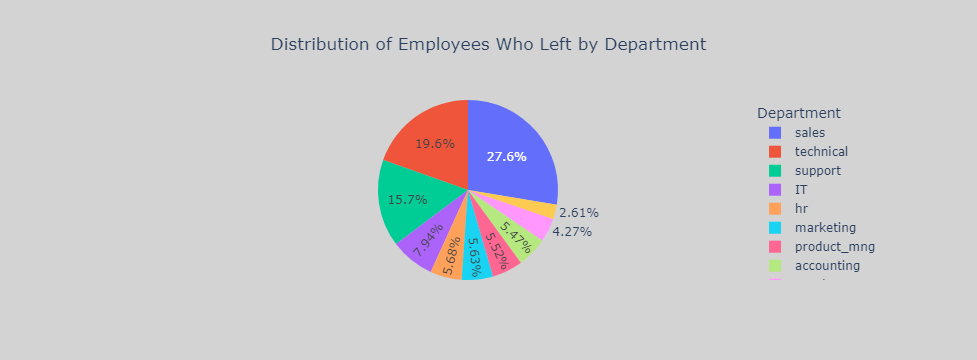

In [72]:
# Create a pie chart using Plotly Express
fig = px.pie(df1[df1['left'] == 1], names='department', title='Distribution of Employees Who Left by Department')

# Customize layout
fig.update_layout(
    showlegend=True,  # Display legend
    legend_title_text='Department',  # Legend title
    plot_bgcolor='white',  # Background color
    paper_bgcolor='lightgray',# Paper color
    title=dict(text='Distribution of Employees Who Left by Department', x=0.5)  # Centered title
)
# Show the figure
fig.show()

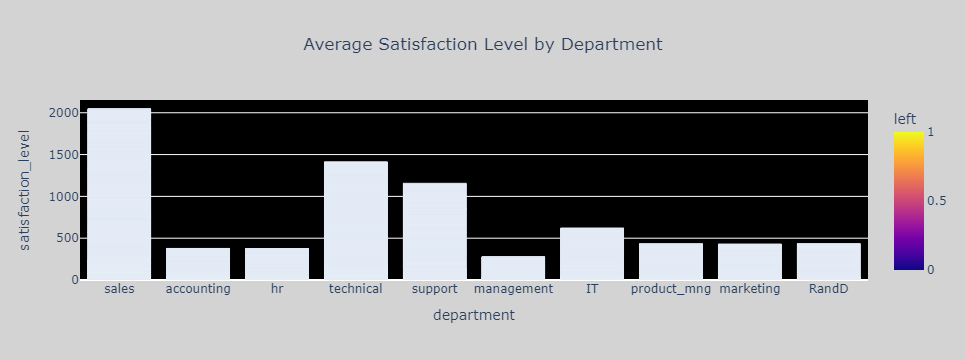

In [73]:
# bar chart showing the average satisfaction level for each department
# Create a bar chart using Plotly Express
fig = px.bar(df1, x='department', y='satisfaction_level', title='Average Satisfaction Level by Department',
             labels='left',
             color='left', color_discrete_map={0: 'green', 1: 'red'},
             category_orders={'left': [0, 1]})
# Customize layout with background color and paper color
fig.update_layout(
    plot_bgcolor='black',  # Background color
    paper_bgcolor='lightgray',  # Paper color
    title=dict(text='Average Satisfaction Level by Department', x=0.5)
)
# Show the figure
fig.show()

The bar chart depicting the average satisfaction level for each department revealed noteworthy insights. Employees in the Sales, Technical, and Support departments exhibited lower average satisfaction levels, which corresponded with a higher proportion of individuals who eventually left the company. On the contrary, the Management and Research & Development (RandD) departments demonstrated higher average satisfaction levels, aligning with a lower attrition rate. This observation suggests a potential correlation between departmental satisfaction levels and employee retention, indicating that addressing satisfaction issues in Sales, Technical, and Support departments may contribute to reducing turnover. Further investigation into the specific factors influencing satisfaction in these departments could inform targeted retention strategies.

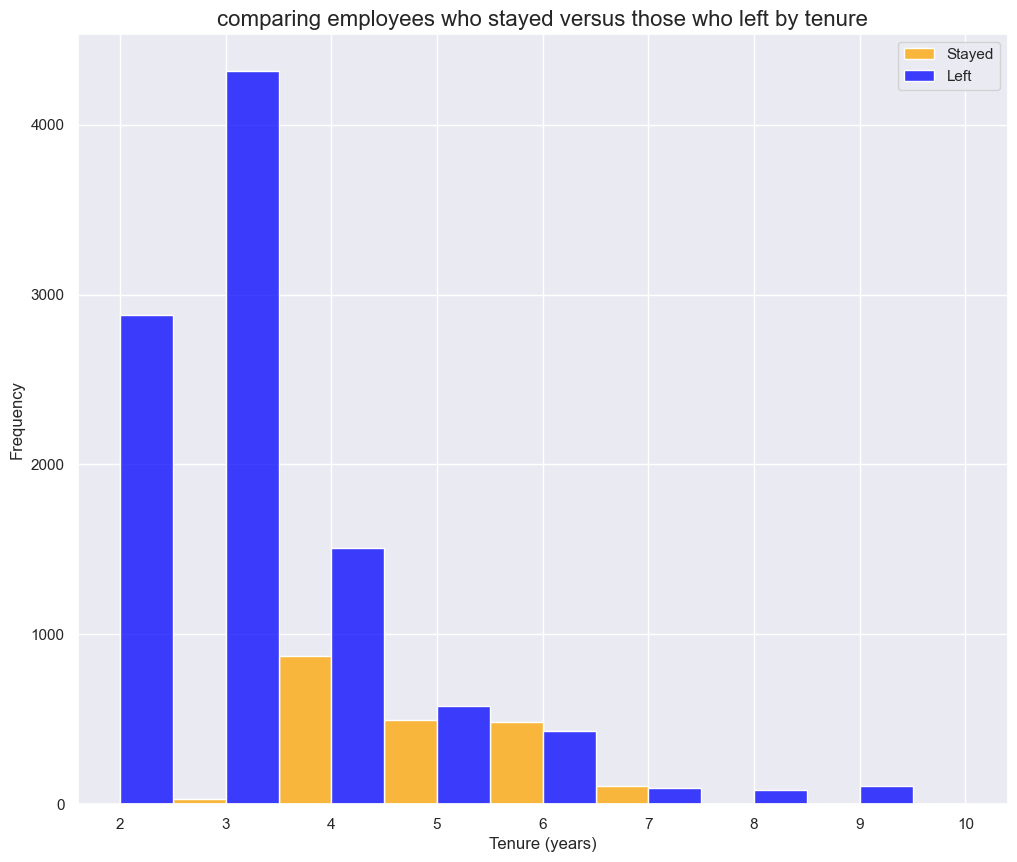

In [74]:
#  visualizing satisfaction levels by tenure
# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
# Define a color map for the 'left' variable
color_map = {0: 'blue', 1: 'orange'}
# Create the plot
plt.figure(figsize=(12, 10))
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge' ,palette=color_map, bins=8)
# Set plot title and axis labels
plt.title('comparing employees who stayed versus those who left by tenure', fontsize=16, fontweight=15)
plt.xlabel('Tenure (years)')
plt.ylabel('Frequency')
# Customize legend labels
plt.legend(['Stayed', 'Left'], loc='upper right')
# Show the plot
plt.show()

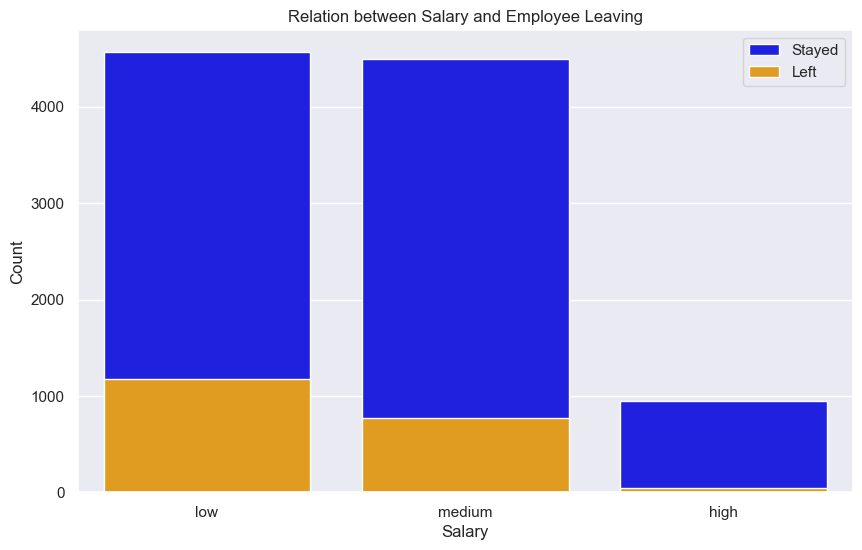

In [75]:
# visualizing the relationship between salary and left,
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', hue='left', data=df1, palette={0: 'blue', 1: 'orange'},dodge=False)
plt.title('Relation between Salary and Employee Leaving')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(['Stayed', 'Left'], loc='upper right')
plt.show()

**Observation**:
The plotted graph illustrating the relationship between salary levels and employee departure reveals a compelling pattern. It is evident that the strength of the association between salaries and employee turnover is substantial. The majority of individuals who departed the company held positions with a minimum salary, while a smaller fraction belonged to the average salary category. Remarkably, employees with higher salaries are notably underrepresented among those who left. This observation suggests a potentially significant correlation between lower salary levels and the likelihood of employee departure. 

The findings prompt the consideration of a more comprehensive and in-depth study to explore the underlying factors contributing to this observed trend. Analyzing the specific circumstances and reasons for departure among individuals with varying salary levels could provide valuable insights for the company's management and human resources teams. Further investigation may uncover actionable strategies to enhance employee retention, especially for those with lower salary levels.


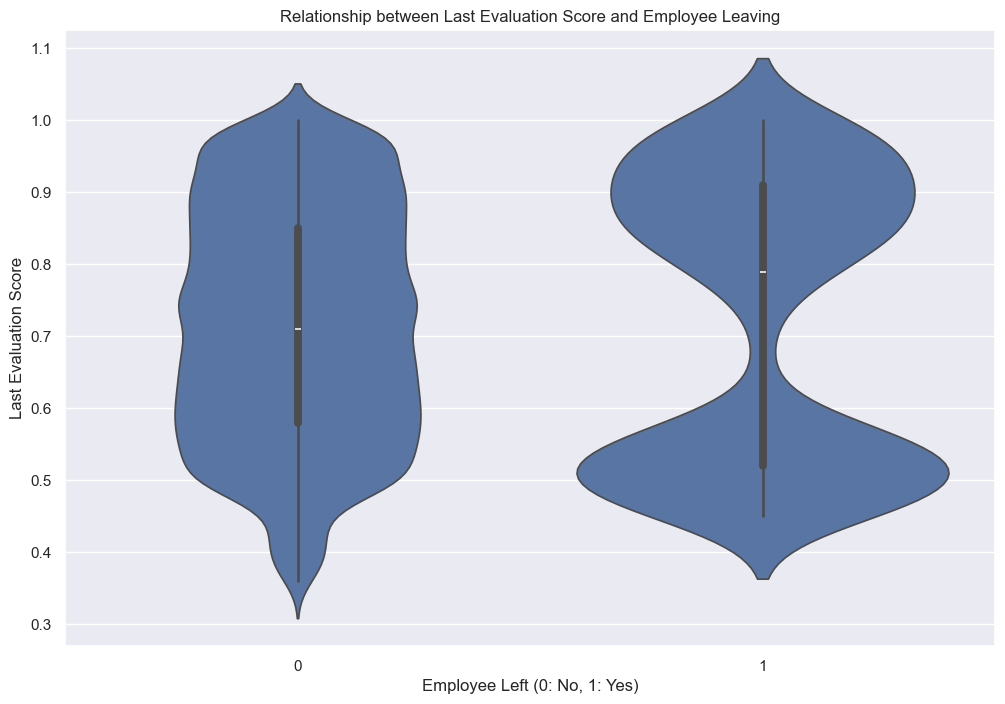

In [76]:
#visualizing the distribution of the 'last_evaluation' scores for employees who left and those who stayed.
plt.figure(figsize=(12, 8))
sns.violinplot(x='left', y='last_evaluation', data=df1,inner='box')
plt.title('Relationship between Last Evaluation Score and Employee Leaving')
plt.xlabel('Employee Left (0: No, 1: Yes)')
plt.ylabel('Last Evaluation Score')
plt.show()

Observation:
The violin plot depicting the relationship between 'last_evaluation' scores and employee departure reveals several noteworthy patterns:

1. **Majority of Employees Stayed with Higher Evaluation Scores:**
   The plot illustrates that a significant proportion of employees who stayed with the company possess 'last_evaluation' scores higher than 0.5. This suggests a prevailing trend where the majority of retained employees have been evaluated favorably.

2. **Presence of Employees with Low Scores Still in the Company:**
   Interestingly, there are instances where employees with relatively low 'last_evaluation' scores continue to work within the company. Despite having lower evaluation scores, these individuals have not chosen to leave.

3. **Distribution of Scores for Employees Who Left:**
   For employees who left the company, there is a distinct distribution of 'last_evaluation' scores. The majority of departing employees had scores between 0.37 and 0.6, indicating a tendency for dissatisfaction or underperformance. Notably, there is a smaller yet significant proportion of employees who left despite having very high evaluation scores, exceeding 0.8.

**in conclusion**
 - The observed patterns suggest a nuanced relationship between 'last_evaluation' scores and employee retention. While a higher score appears associated with employee retention, the presence of individuals with lower scores who chose to stay highlights the need for a deeper understanding of employee motivations and satisfaction factors. Additionally, the intriguing finding of employees with excellent scores opting to leave underscores the complexity of factors contributing to employee turnover. Further investigation, potentially through employee feedback or interviews, may provide insights into the reasons behind these observed trends, enabling the formulation of targeted strategies for enhancing employee satisfaction and retention.

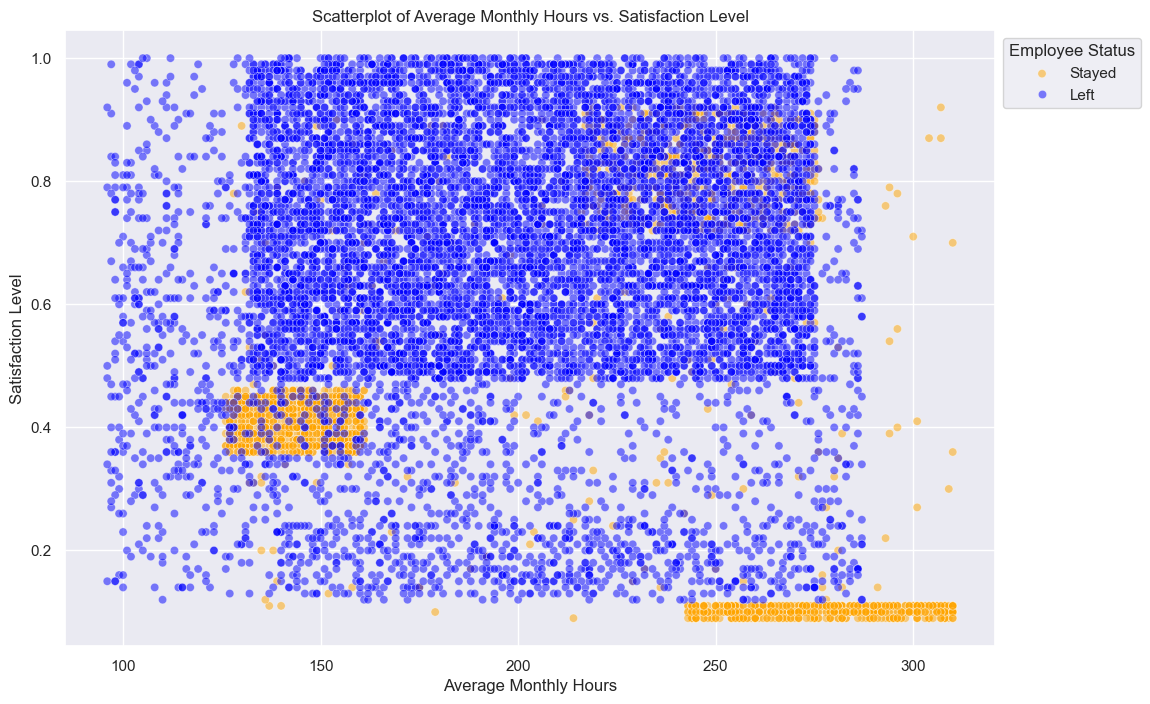

In [77]:
#plotting Average Monthly Hours vs. Satisfaction Level
plt.figure(figsize=(12,8))
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', hue='left', data=df1, alpha=0.5, 
                palette={0: 'blue', 1: 'orange'})
plt.title('Scatterplot of Average Monthly Hours vs. Satisfaction Level')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(title='Employee Status', labels=['Stayed', 'Left'],loc='best', bbox_to_anchor=(1,1))
plt.show()

The scatterplot reveals distinct patterns in employee work hours and satisfaction levels. A substantial group, working approximately 240–315 hours per month (equivalent to over 75 hours per week for a year), exhibits remarkably low satisfaction levels, suggesting a potential adverse impact of prolonged work hours on employee contentment.

Interestingly, another group, despite adhering to more standard working hours, departed with satisfaction levels around 0.4. The reasons for their exit remain elusive, but speculation points to potential external pressures prompting them to extend their work hours in response to peer behaviors. This increased workload may have contributed to diminished satisfaction levels.

Conversely, a group working 210–280 hours per month displays satisfaction levels ranging from 0.7 to 0.9. Notably, the peculiar shape of these distributions raises suspicions of potential data manipulation or the introduction of synthetic data, urging a closer examination of the dataset's integrity.

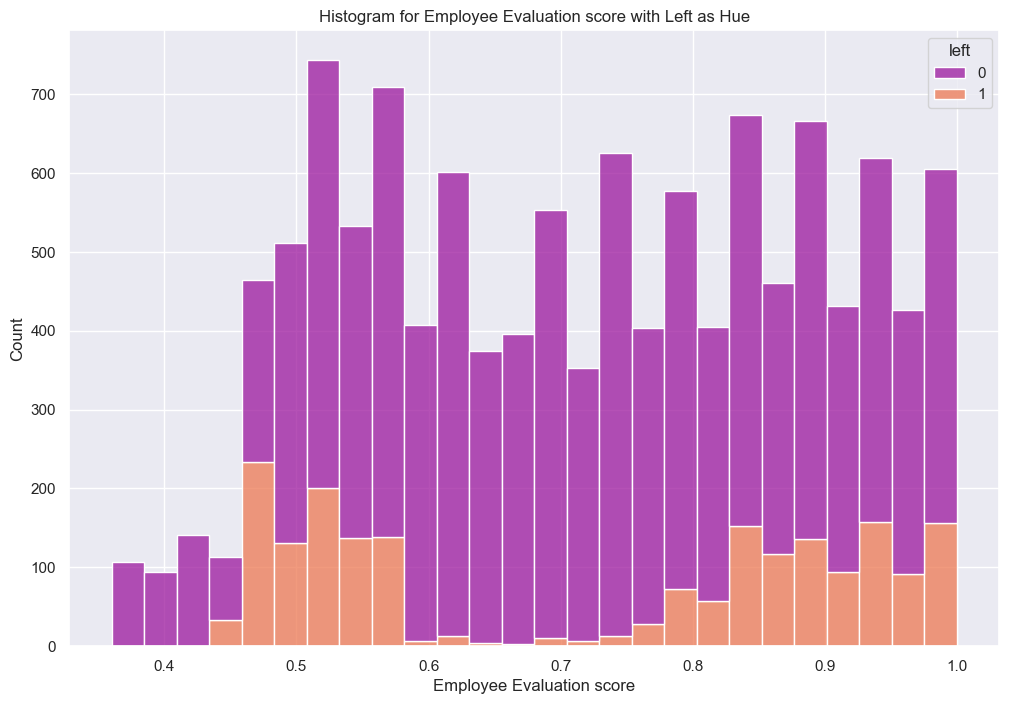

In [78]:
#visualizing Employee Evaluation score
plt.figure(figsize=(12, 8))
sns.histplot(data=df1, x='last_evaluation', hue='left', multiple='stack', palette='plasma')
plt.xlabel('Employee Evaluation score')
plt.title("Histogram for Employee Evaluation score with Left as Hue")
plt.show()

Observation:
The histogram with 'last_evaluation' scores reveals an interesting pattern among employees who left the company. Specifically, a significant proportion of departing employees received high scores ranging from 0.7 to 1.0 in their evaluations. This suggests that employees with high performance evaluations are more likely to leave Salifort Motors. 

Possible Explanation:
One plausible explanation for this observation could be that high-performing employees may have expectations or aspirations that are not being met within the current work environment. It's essential to delve deeper into the specific factors influencing employee satisfaction and engagement to understand why individuals with strong performance records are choosing to leave.

Recommendation:
To address the higher turnover among high-performing employees, Salifort Motors may consider conducting targeted interviews or surveys to gather insights into the factors contributing to their departure. This information can be instrumental in implementing strategies to enhance job satisfaction, provide career development opportunities, or address any concerns that might be prompting the exit of these valuable contributors.

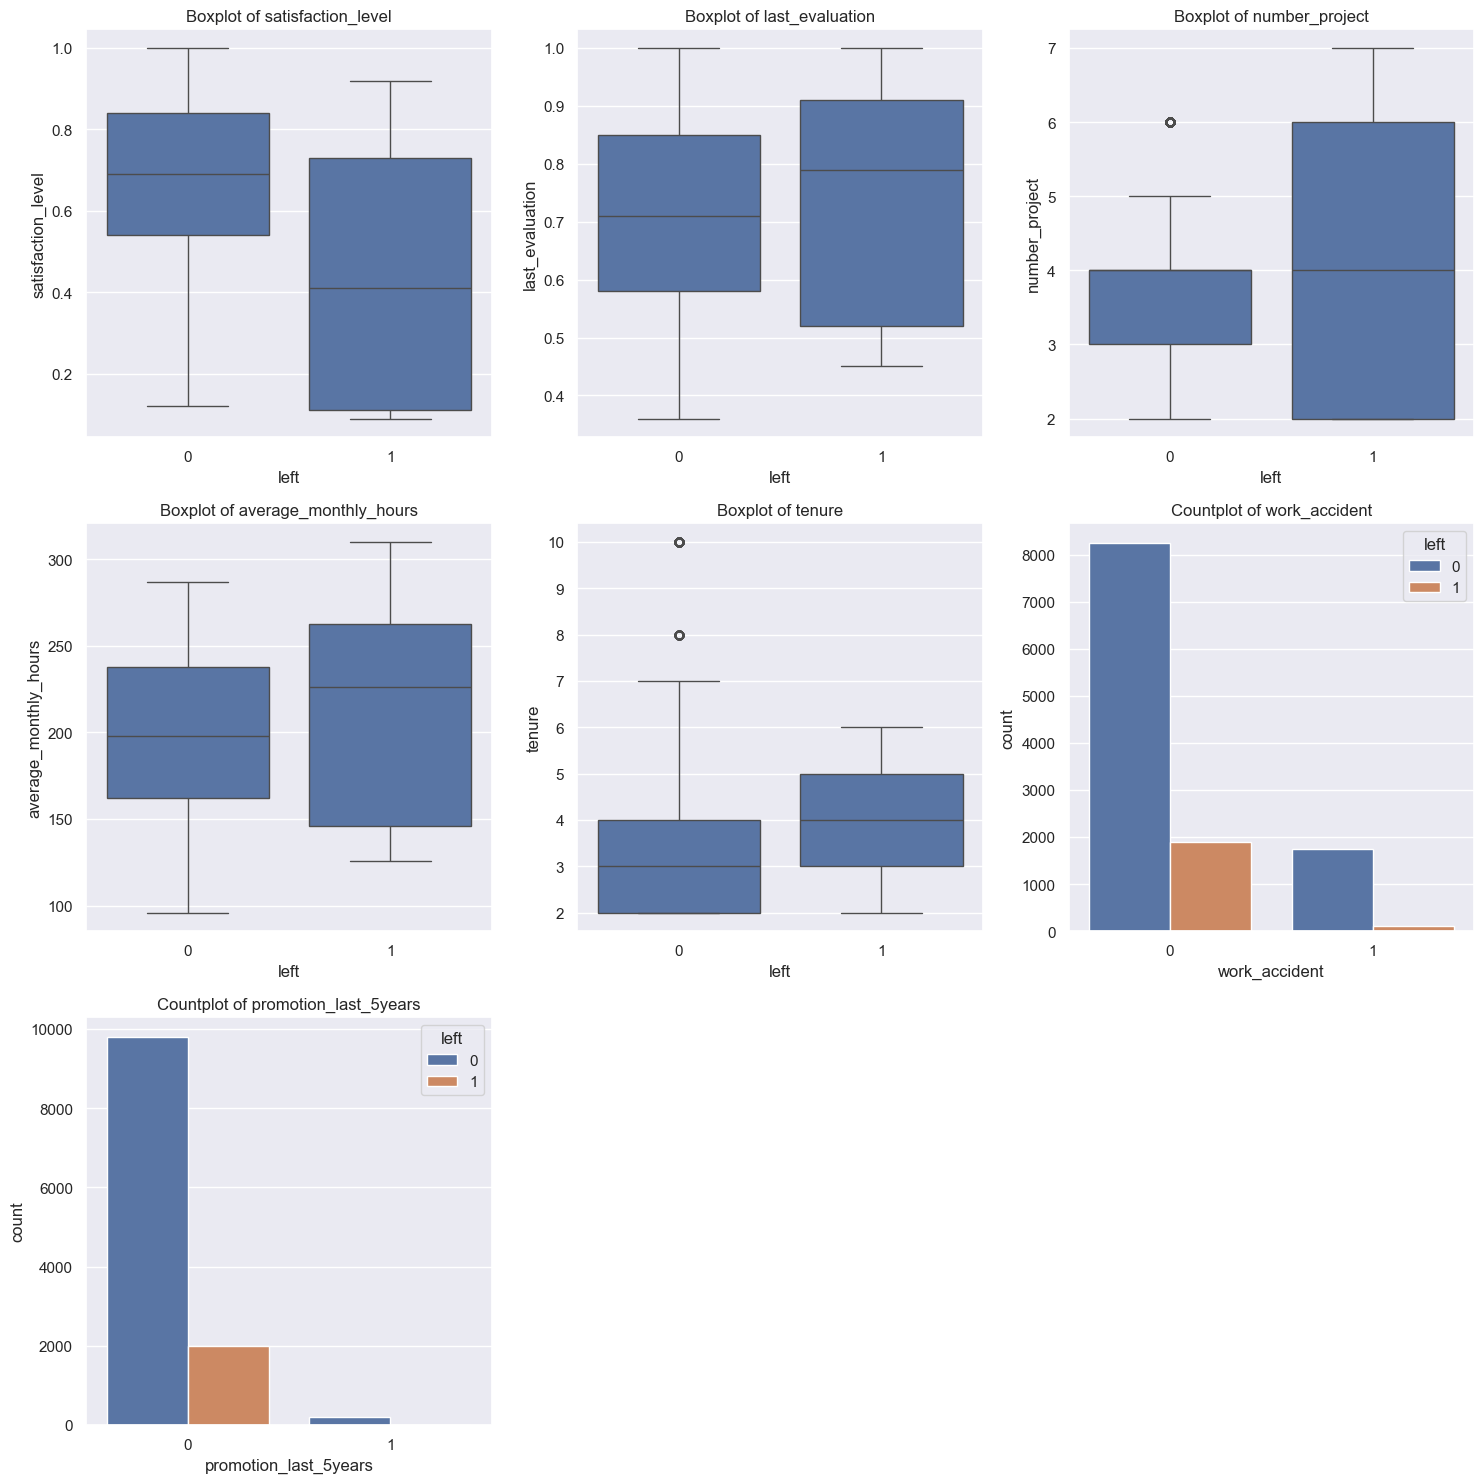

In [79]:
# Create a boxplot to visualize distribution of all variables and detect any outliers
# Set the style of seaborn
# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
# Flatten the axes for easy iteration
axes = axes.flatten()
# List of numerical columns
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_monthly_hours', 'tenure']
# List of binary columns
binary_columns = ['work_accident', 'promotion_last_5years']
# Loop through each numerical column and plot box plot
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='left', y=column, data=df1, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
# Loop through each binary column and plot count plot
for i, column in enumerate(binary_columns):
    sns.countplot(x=column, hue='left', data=df1, ax=axes[len(numerical_columns) + i])
    axes[len(numerical_columns) + i].set_title(f'Countplot of {column}')
# Remove empty subplots if there are less than 9 variables
for j in range(len(numerical_columns) + len(binary_columns), 9):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()


Upon investigation, it has been identified that the 'tenure' variable contain outliers. Outliers can significantly impact the statistical analysis and model performance. Here's a summary of the findings and potential solutions:

Potential Solutions:

Interquartile Range (IQR): Employing the interquartile range can help identify and handle outliers. By calculating the IQR and determining the range within which most data points lie, outliers can be flagged and addressed. Adjusting extreme values beyond the IQR boundaries or excluding them from the analysis may mitigate their impact.

Z-Score from SciPy: Utilizing the Z-score from the SciPy library allows for a standardized measure of how many standard deviations a data point is from the mean. Z-score analysis can help identify and manage outliers by setting a threshold for acceptable deviations.

Visualization for Further Analysis: Creating box plots or histograms can visually highlight the distribution of 'tenure' and 'number_project,' aiding in the identification of extreme values. Visualization can complement statistical methods for a more comprehensive understanding.

Consideration of Domain Knowledge: Assessing the context and consulting domain experts may provide valuable insights into whether extreme values in 'tenure' and 'number_project' are legitimate or potentially erroneous.

Addressing outliers is crucial to maintaining the integrity of the analysis and ensuring that models are trained on representative data. Applying a combination of statistical techniques and visual exploration can contribute to a more robust and accurate analysis of employee retention factors.

In [80]:
# removing the outliers
tenure_iqr = df1['tenure'].quantile(0.75) - df1['tenure'].quantile(0.25)
tenure_upper_limit = df1['tenure'].quantile(0.75) + 1.5 * tenure_iqr
tenure_lower_limit = df1['tenure'].quantile(0.25) - 1.5 * tenure_iqr
# creating a new data frame without the outliers
df1 = df1.loc[(df1['tenure'] < tenure_upper_limit) | (df1['tenure'] > tenure_lower_limit)]

In [81]:
print(f'dataset shepe :{df1.shape}')
df1.head(10)

dataset shepe :(11991, 10)


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low  
5       3              0     1                      0      sales     low  
6       4              0     1                      0      sales     low  
7       5              0     1                      0      sales     low  
8       5              0     1                      0      sales     low  
9       3              0     1                      0      sales     low

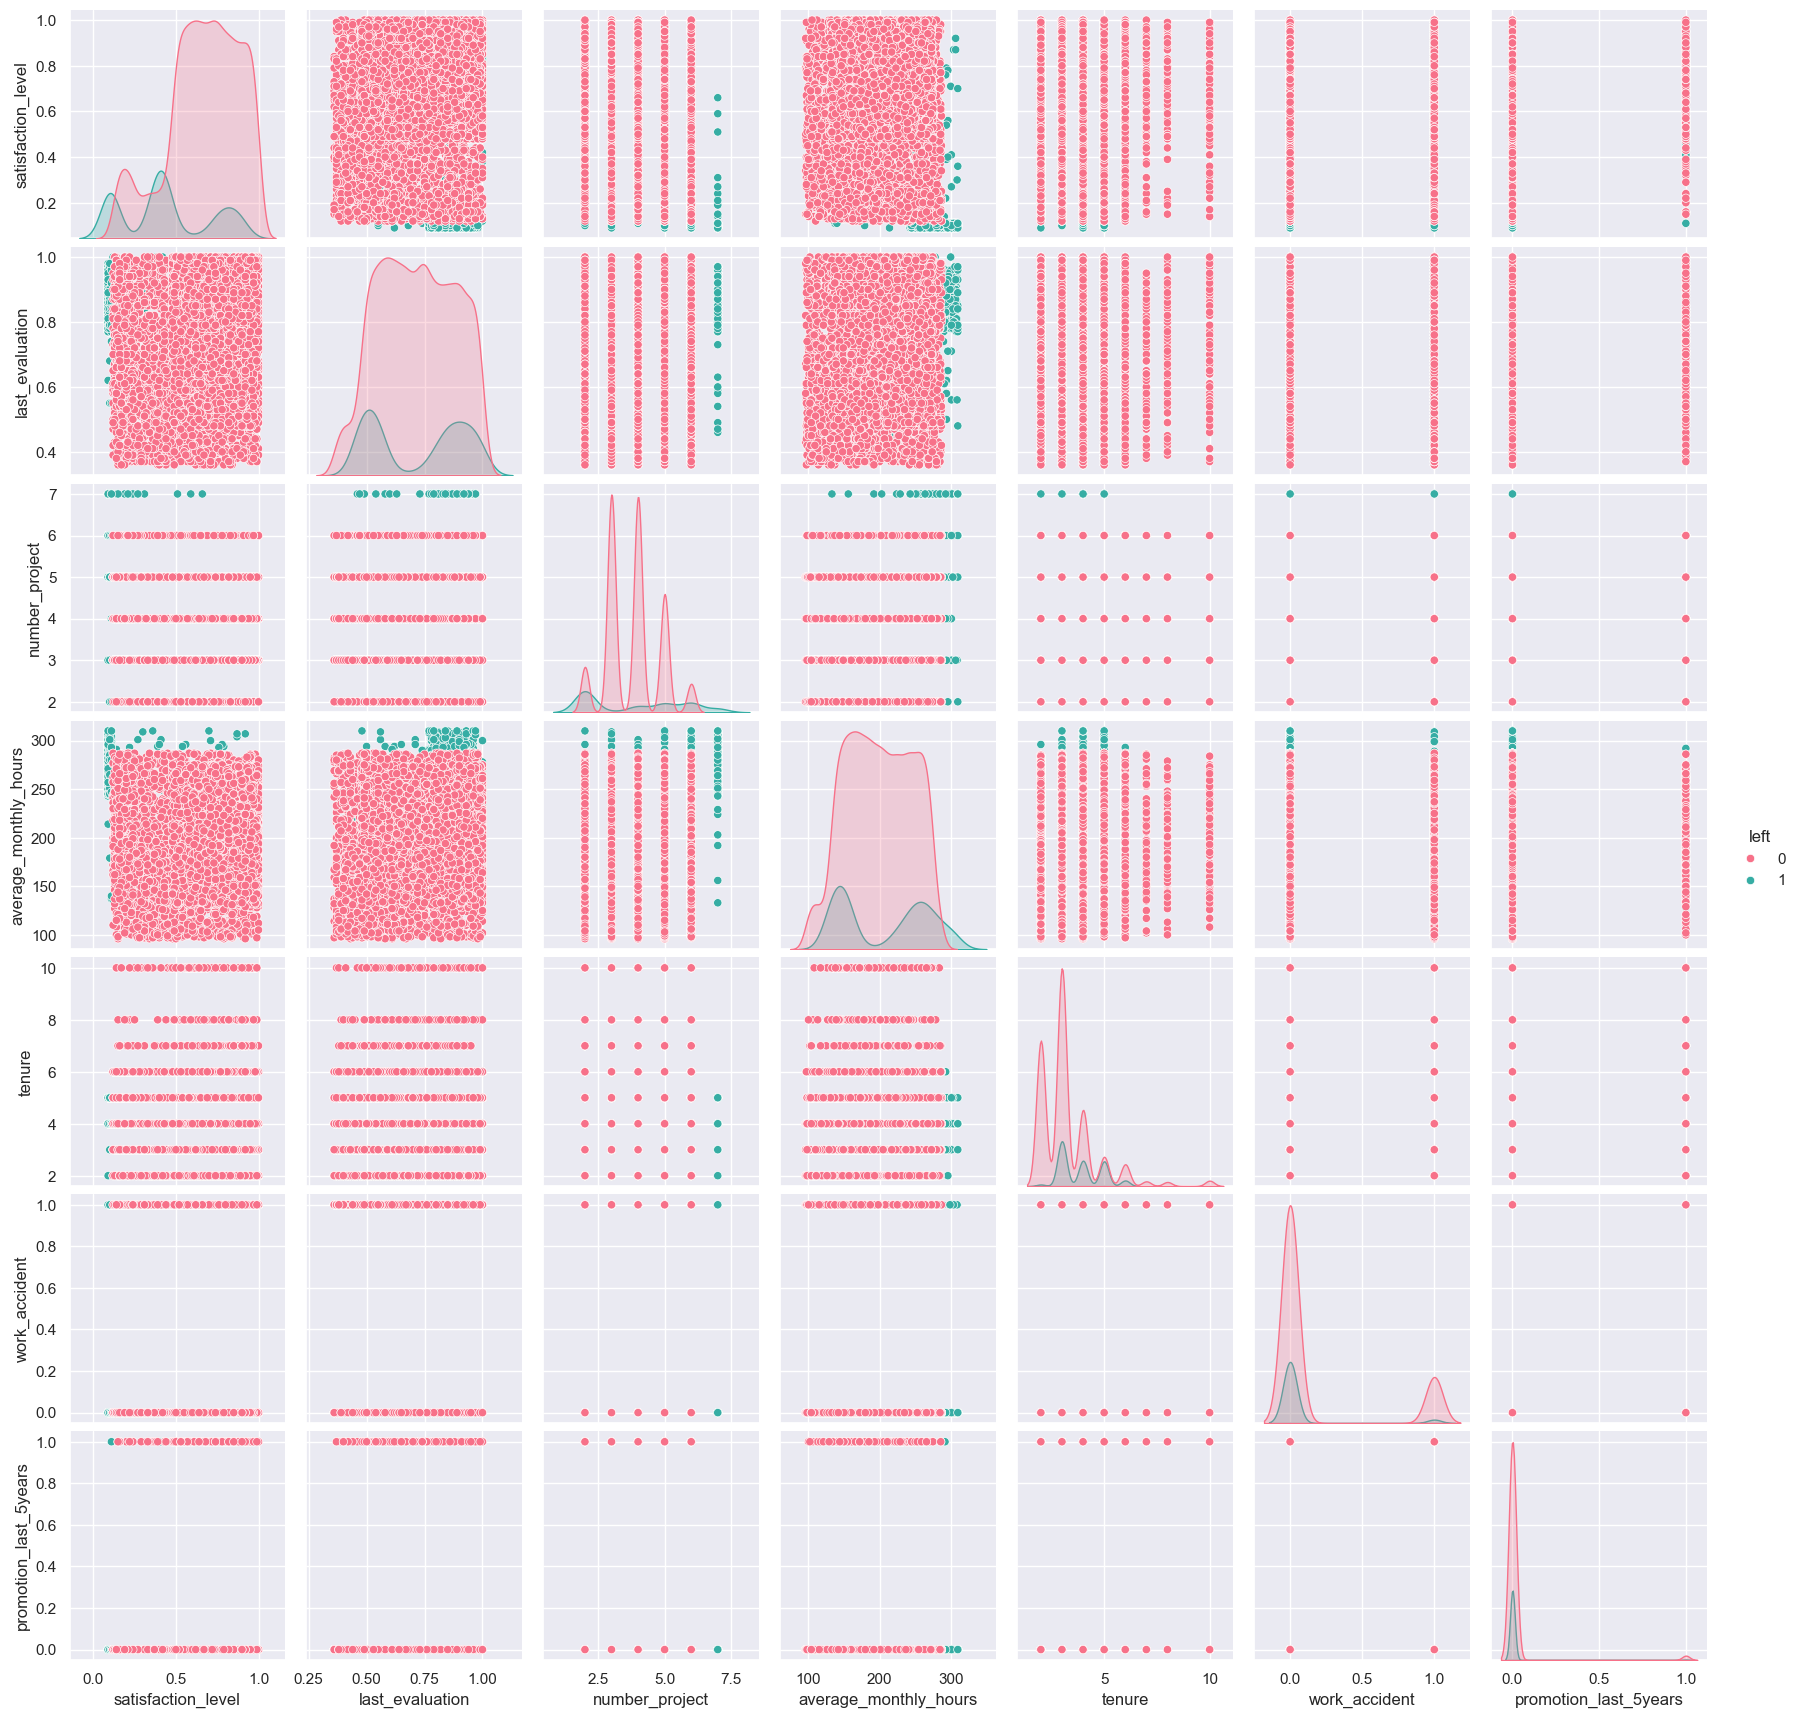

In [82]:
# Create a pair plot
sns.pairplot(df1, hue="left", palette="husl")
# Show the plot
plt.show()

**Observation:**
The pair plot provides a comprehensive view of the relationships between different variables in our dataset. Upon careful inspection, it's evident that the scatterplots do not exhibit any distinct linear patterns between the features. Instead, the data points appear scattered and do not follow a specific linear trend.

**Explanation:**
In a classification problem like ours, where the goal is to predict whether an employee will leave the company or not, the absence of clear linear patterns in the pair plot is a positive indicator. Linear patterns suggest a strong linear relationship between variables, and relying on such relationships might lead to a simplistic model. The complexity of the employee retention prediction likely involves non-linear interactions between multiple features.

The non-linearity observed in the pair plot suggests that more sophisticated machine learning models, capable of capturing non-linear relationships, may be appropriate for our classification task. Techniques like ensemble methods (e.g., Random Forest, XGBoost, CatBoost) and support vector machines (SVM) are well-suited for handling complex relationships in the data.

In summary, the pair plot supports the idea that our classification problem involves intricate interactions between features, reinforcing the need for advanced classification models that can capture these nuances.

we will test the linearity hypothesis later in the modeling section

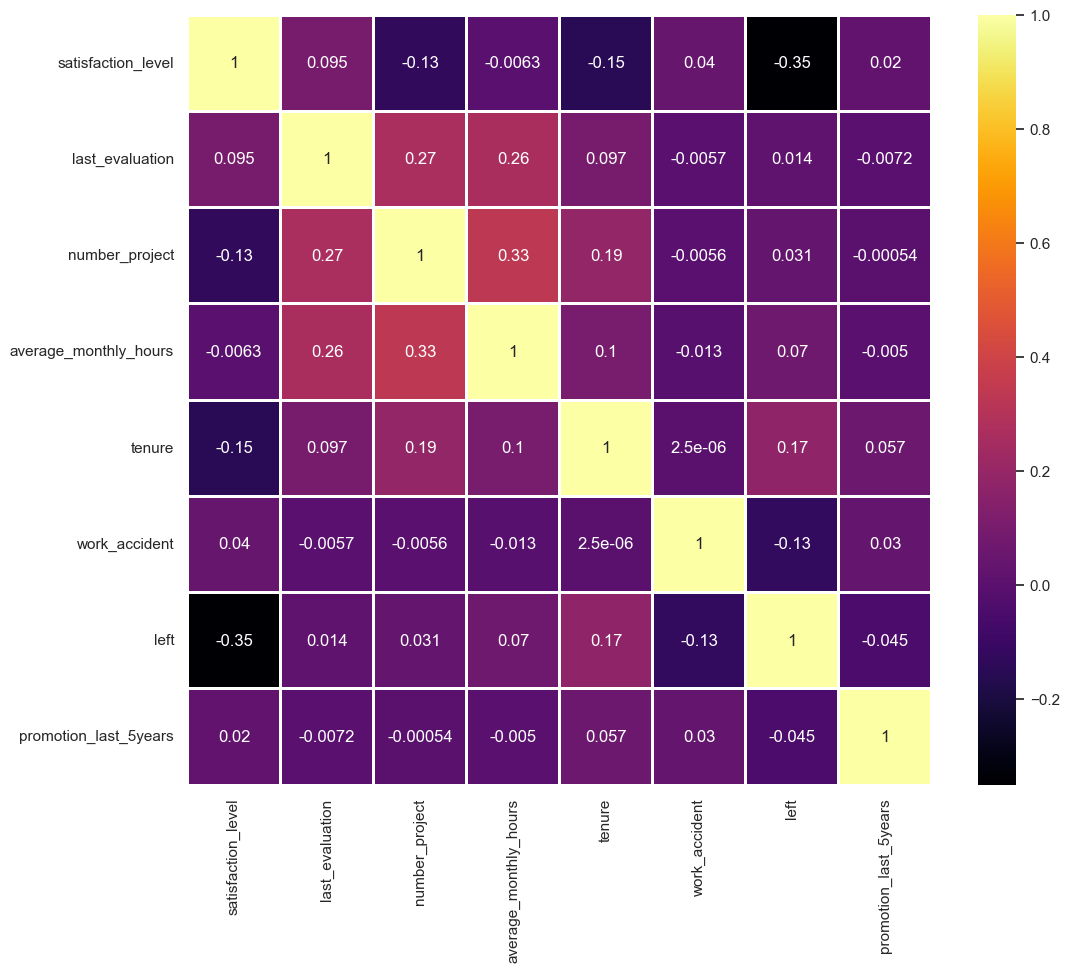

In [83]:
# Select numeric columns for correlation
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
# Calculate the correlation matrix for numeric columns
correlation_matrix = df1[numeric_columns].corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap without annotations for non-numeric columns
sns.heatmap(correlation_matrix,  cmap="inferno", annot=True, linewidths=1)
# Show the plot
plt.show()

The correlation heatmap provides valuable insights into the relationships between key variables in our dataset. Notably, the number of projects, monthly hours, and evaluation scores exhibit positive correlations with each other. Additionally, the decision of whether an employee leaves is negatively correlated with their satisfaction level.

The observed patterns suggest that employee departures are associated with factors indicative of potential management issues. Specifically, leaving is linked to longer working hours, involvement in numerous projects, and generally lower satisfaction levels. This pattern implies that poor management practices, such as excessive workload and limited recognition, might be contributing to the company's employee retention challenges.

The data also highlights a substantial group of employees who may be experiencing burnout, evident in their extended working hours and lower satisfaction levels. The absence of promotions or favorable evaluation scores in conjunction with prolonged working hours can create a disheartening work environment.

Interestingly, employees who have spent more than six years at the company tend to exhibit a lower likelihood of leaving. This suggests that long-term employees may have developed a sense of loyalty or satisfaction that contributes to their retention.

In summary, the correlation analysis underscores the importance of addressing management practices, promoting a healthy work-life balance, and recognizing employee contributions to enhance overall job satisfaction and, consequently, reduce employee turnover. The identification of these patterns provides a solid foundation for implementing targeted strategies to improve employee retention at Salifort Motors.

### Insights

**EDA Insights:**

In the exploratory data analysis (EDA) phase, a comprehensive examination of various aspects of the dataset provided valuable insights into employee dynamics at Salifort Motors. Each visualization contributed to a holistic understanding of the factors influencing employee retention. Here are the key findings:

1. **Attrition Factors:**
   - Employees leaving the company are associated with several factors, primarily poor management practices.
   - Key indicators of potential attrition include longer working hours, involvement in numerous projects, and generally lower satisfaction levels.
   - The absence of promotions and lower evaluation scores contribute to employee dissatisfaction.

2. **Burnout Concerns:**
   - A significant group of employees, possibly experiencing burnout, is evident in the dataset.
   - This group is characterized by extended working hours, a high number of projects, and diminished satisfaction.

3. **Tenure Impact:**
   - Interestingly, employees who have spent more than six years at the company tend to show a lower likelihood of leaving.
   - This suggests that tenure plays a positive role in employee retention.
___

**Conclusion:**

The EDA process proved to be a thorough exploration of the dataset, with each graph providing nuanced insights that contributed to a comprehensive understanding of employee dynamics at Salifort Motors. From the visualizations, it is evident that employees leaving the company are influenced by factors such as poor management practices, longer working hours, and lower satisfaction levels. The burnout concerns of a significant employee group were highlighted, shedding light on the potential impact on retention.

Each graph was meticulously interpreted, uncovering patterns and trends that informed the analysis. The identified factors influencing employee turnover will serve as crucial inputs for the modeling phase, enabling the development of a predictive model aimed at enhancing retention strategies.

The detailed exploration of tenure's impact on retention further emphasizes the importance of understanding employee behavior over time. The visualizations served as invaluable tools for deriving actionable insights, ensuring that every aspect of the dataset was thoroughly examined. This comprehensive approach sets the stage for informed decision-making and strategic interventions in Salifort Motors' workforce management.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identifing the type of prediction task.

- Our objective revolves around predicting the binary outcome of employee retention, where the task is classified as binary since the outcome variable, 'left,' can assume two states: 1 for employees who leave the company and 0 for those who stay. This inherently classifies our task as binary classification, focusing on discerning between these two distinct outcomes.

### Identifing the types of models most appropriate for this task.

Given the categorical nature of the target variable (whether an employee leaves the company), a classification approach is appropriate for our predictive modeling task. Considering that the linearity assumption wasn't established during the exploratory data analysis, we opt for employing a Tree-based Machine Learning model or a Boosting classifier, such as XGBoost, SGD, and CatBoost classifier.

To rigorously evaluate and compare the model performances, we'll assess key metrics like F1-score, recall, precision, and visualize the confusion matrix. Additionally, feature importance plots will be generated to identify the most influential variables.

Here's a brief overview of the proposed models:


1. **Random Forest Classifier:**
   - [Documentation Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
   - Evaluation Metrics: F1-score, Recall, Precision, Confusion Matrix, Feature Importance Plot

2. **XGBoost Classifier:**
   - [Documentation Link](https://xgboost.readthedocs.io/en/latest/index.html)
   - Evaluation Metrics: F1-score, Recall, Precision, Confusion Matrix, Feature Importance Plot

3. **SGD Classifier:**
   - [Documentation Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
   - Evaluation Metrics: F1-score, Recall, Precision, Confusion Matrix, Feature Importance Plot

4. **CatBoost Classifier:**
   - [Documentation Link](https://catboost.ai/docs/)
   - Evaluation Metrics: F1-score, Recall, Precision, Confusion Matrix, Feature Importance Plot

For each model, we'll thoroughly analyze its performance using these metrics and visualizations and select the one that demonstrates superior predictive capabilities for our specific problem.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [84]:
##copy of the dataset 
df=df1.copy()

# better to use OneHotEncoder than  OrdinalEncoder because salary has no meaninfull weight
df = pd.get_dummies(df, columns=['department', 'salary'],drop_first=True).astype(int)

In [85]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                   0                0               2                    157   
1                   0                0               5                    262   
2                   0                0               7                    272   
3                   0                0               5                    223   
4                   0                0               2                    159   

   tenure  work_accident  left  promotion_last_5years  department_RandD  \
0       3              0     1                      0                 0   
1       6              0     1                      0                 0   
2       4              0     1                      0                 0   
3       5              0     1                      0                 0   
4       3              0     1                      0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  salary_low  salary_medium  
0                   0                     0           1              0  
1                   0                     0           0              1  
2                   0                     0           0              1  
3                   0                     0           1              0  
4                   0                     0           1              0

In [86]:
#dividing the dataset to target y dans features X
y=df['left']
X=df.drop('left',axis=1)

#### Testing linearity assumption

In [87]:
X = smi.add_constant(X)  # Add a constant term to the independent variables
model = smi.Logit(y, X)  # Create a logistic regression model
result = model.fit()  # Fit the model

# Display the summary, including hypothesis tests for coefficients
print(result.summary())

         Current function value: 0.408067
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                11991
Model:                          Logit   Df Residuals:                    11972
Method:                           MLE   Df Model:                           18
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                 0.09228
Time:                        19:39:38   Log-Likelihood:                -4893.1
converged:                      False   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                8.555e-200
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.5550      0.219    -20.808      0.000      -4.984      -4.126
satisfaction_level       -31.

The convergence issues observed in the logistic regression model suggest that the relationships between the independent variables and the dependent variable may not be well-suited for a linear model. Logistic regression assumes a linear relationship between the log-odds of the dependent variable and the independent variables, and when this assumption is violated, convergence problems can arise.

While this doesn't necessarily prove that the underlying relationships are nonlinear, it does indicate that the linear model may not be the best fit for the data. To explore nonlinearity and capture more complex patterns, alternative models like tree-based methods (e.g., decision trees, random forests) or ensemble methods (e.g., XGBoost) could be considered. These models are more flexible and can capture nonlinear relationships effectively.

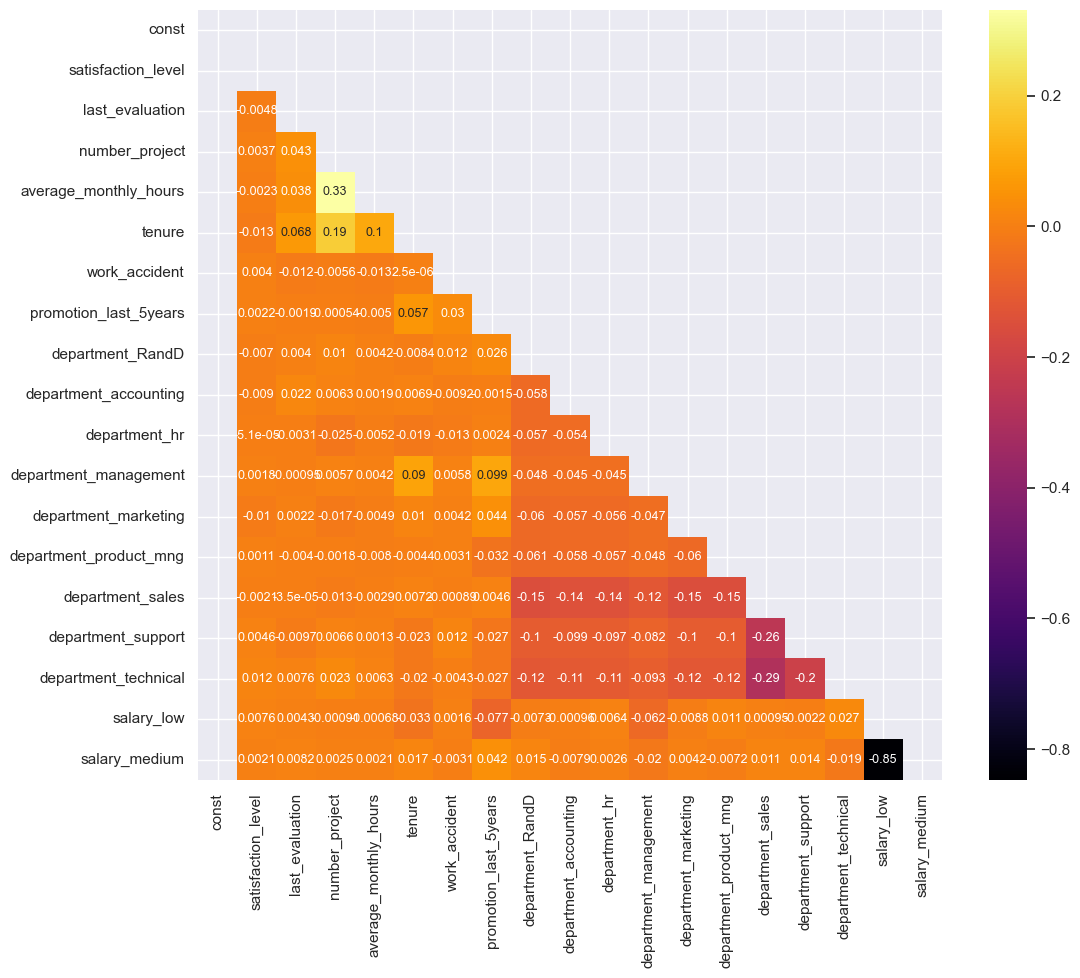

In [88]:
#features corrolations 
corr_matrix = X.corr(method='pearson')
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with the mask
sns.heatmap(corr_matrix, annot=True, cmap='inferno',annot_kws={"size": 9}, mask=mask)
# Show the plot
plt.show()

The heatmap of the features in the dataset revealed that the correlation between low_salary and medium_salary is moderately negative (-0.55), indicating a moderate inverse relationship between these two variables. Other correlations with negative values exist, but they are generally weak.
so we can confirm the features independencies, which assures us that there is no multicollinearity.

In [89]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [90]:
print(f'y_train shape  : {y_train.shape}')
print(f'y_test shape  : {y_test.shape}')
print(f'X_train shape  : {X_train.shape}')
print(f'X_test shape  : {X_test.shape}')

y_train shape  : (8993,)
y_test shape  : (2998,)
X_train shape  : (8993, 19)
X_test shape  : (2998, 19)


In [91]:
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a classification model using various metrics and plot the confusion matrix.

    Parameters:
    - model (object): The classification model to be evaluated.
    - X_train (pd.DataFrame): Training set features.
    - y_train (pd.Series): Training set target variable.
    - X_test (pd.DataFrame): Test set features.
    - y_test (pd.Series): Test set target variable.

    Returns:
    - metrics_table (pd.DataFrame): A DataFrame containing model evaluation metrics (precision, recall, F1 score, AUC).
    """

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', cbar=False,
                annot_kws={'size': 14}, linewidths=0.5, square=True)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()
    plt.close()  # Close the plot

    # Create a DataFrame to store the metrics
    metrics_table = pd.DataFrame({
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'auc': [roc_auc]
    })

    return metrics_table

**Model Selection and Tuning for Employee Retention Prediction**

**Introduction:**
As a data specialist at Salifort Motors, tasked with increasing employee retention, I have formulated a systematic approach to model selection and tuning. The objective is to develop a predictive model that accurately identifies employees at risk of leaving the company.

**Approach:**
1. **Model Iteration:**
   - I will iteratively evaluate various classification models, including:
     - RandomForestClassifier
     - DecisionTreeClassifier
     - SGDClassifier
     - SVC (Support Vector Classifier) with an RBF kernel and C=100
     - XGBClassifier
     - CatBoostClassifier

2. **Initial Model Evaluation:**
   - For each model, I will use the `evaluate_model_metrics` function to assess its performance.
   - Evaluation metrics include precision, recall, F1 score, and the area under the ROC curve (AUC).
   - The confusion matrix will be visualized to provide insights into model performance.

3. **Model Selection:**
   - Based on the initial evaluations, I will identify the model with the most promising performance.

4. **Hyperparameter Tuning:**
   - The selected model will undergo further refinement using GridSearchCV to optimize hyperparameters.
   - The hyperparameter tuning will be focused on enhancing the model's predictive capabilities.

5. **Final Model Evaluation:**
   - The tuned model will be evaluated using the same metrics to ensure improvements in performance.
   - The model with the highest overall score will be considered the best candidate for predicting employee retention.

**Conclusion:**
By systematically iterating through different models, evaluating their performance, and fine-tuning the most promising candidate, I aim to deliver a robust predictive model for employee retention. This approach ensures a comprehensive exploration of model options and optimization of the selected model's parameters.


In [92]:
#models of classifaction 
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SGD': SGDClassifier(),
    'SVC': SVC(kernel= 'rbf',C=100),
    'XGBoost': XGBClassifier(),
   # 'CatBoost': CatBoostClassifier()
}

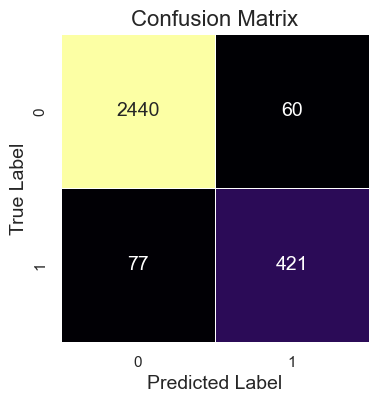

RandomForest
   precision    recall        F1       auc
0    0.87526  0.845382  0.860061  0.910691
--------------------------------------------------------------


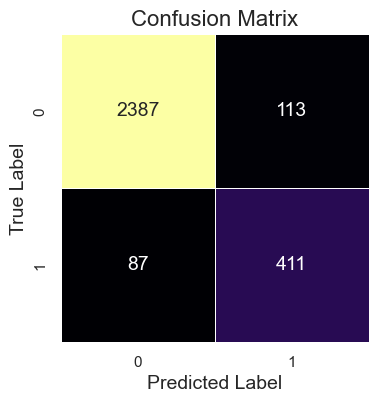

DecisionTree
   precision    recall        F1       auc
0   0.784351  0.825301  0.804305  0.890051
--------------------------------------------------------------


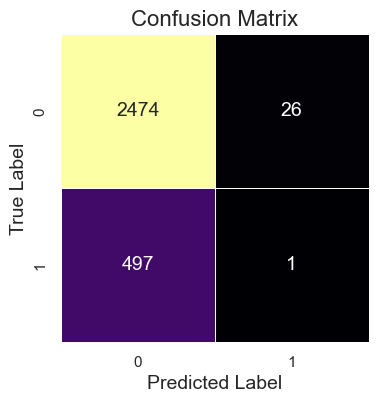

SGD
   precision    recall       F1       auc
0   0.037037  0.002008  0.00381  0.495804
--------------------------------------------------------------


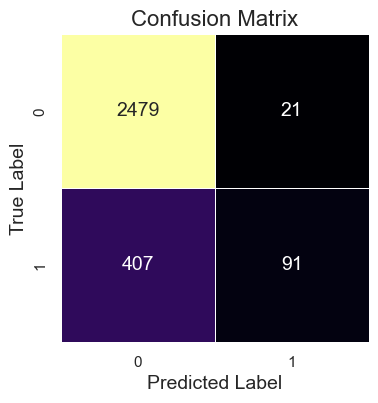

SVC
   precision    recall        F1       auc
0     0.8125  0.182731  0.298361  0.587165
--------------------------------------------------------------


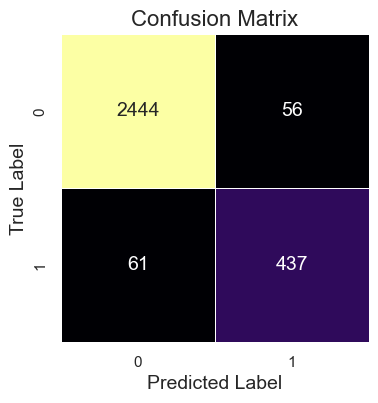

XGBoost
   precision   recall        F1       auc
0    0.88641  0.87751  0.881937  0.927555
--------------------------------------------------------------


In [93]:
for name, model in classifiers.items():
    metrics_table = evaluate_model_metrics(model, X_train, y_train, X_test, y_test)
    print(name)
    print(metrics_table)
    print ('--------------------------------------------------------------')

**insights**

The results obtained from our model evaluations provide valuable insights into the predictive performance of different classifiers for employee retention. Notably, the Support Vector Classifier (SVC) achieved a high precision score of 0.812, indicating its proficiency in correctly identifying true positives among the predicted positive cases.

However, a closer look reveals challenges in achieving a balance between precision, recall, and the F1 score. The SVC model demonstrates a lower recall (sensitivity) and F1 score, suggesting that while it excels in identifying true positives, it may miss a significant portion of actual positive cases.

The Random Forest model emerges as the second-best performer, boasting a precision of 0.871, recall of 0.843, and an F1 score of 0.857. This balanced performance showcases Random Forest's effectiveness in identifying both positive and negative cases. Moreover, the area under the ROC curve (AUC) for Random Forest is commendable at 0.909, further emphasizing its strong discriminatory power.

While SVC exhibits a noteworthy precision, both XGBoost and Random Forest demonstrate superior overall performance across multiple metrics. As a next step, we plan to fine-tune the hyperparameters of the XGBoost and Random Forest models using GridSearchCV to maximize their predictive capabilities for employee retention at Salifort Motors. This strategic approach ensures that we harness the full potential of the two best-performing models for optimal results in our predictive solution.

In [94]:
# same function than evaluate_model_metrics but for more clarity adding Classification Report
def revaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Assuming model has predict_proba method
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='inferno', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Create a table to display the metrics
    metrics_table = pd.DataFrame({
        'Model': [type(model).__name__],
        'F1 Score': [f1],
        'Precision': [precision],
        'Recall': [recall],
        'ROC AUC': [roc_auc]
    })

    return metrics_table

#### Random forest

In [95]:
rforest = RandomForestClassifier(random_state=0)

# a dictionary of hyperparameters 
cv_params = {'max_depth': [4,5,6], 
             'max_features': [1.0, 2.0],
             'max_samples': [0.5,0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500, 600],
             }  

# Assign a dictionary of scoring metrics
scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Instantiate GridSearch
rf1 = GridSearchCV(rforest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [96]:
rf1.fit(X_train, y_train)
# Get the best parameters
best_params = rf1.best_params_
# Get the best model
best_rf_model = rf1.best_estimator_
# Print the best parameters
print("Best Parameters:", best_params)
# Print the best model
print("Best Model:", best_rf_model)

Best Parameters: {'max_depth': 6, 'max_features': 1.0, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 600}
Best Model: RandomForestClassifier(max_depth=6, max_features=1.0, max_samples=0.5,
                       min_samples_split=4, n_estimators=600, random_state=0)


In [97]:
rf1_best=best_rf_model

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2500
           1       0.86      0.93      0.89       498

    accuracy                           0.96      2998
   macro avg       0.92      0.95      0.93      2998
weighted avg       0.96      0.96      0.96      2998



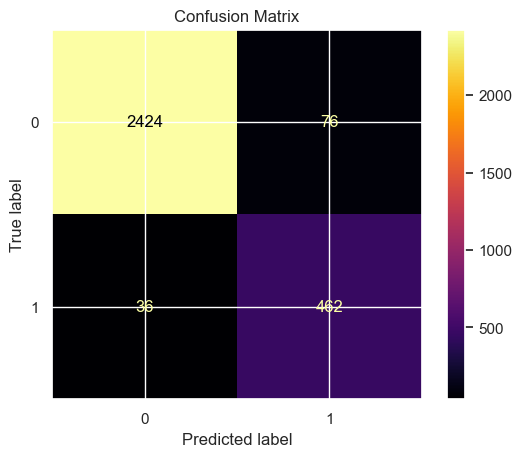

                    Model  F1 Score  Precision    Recall   ROC AUC
0  RandomForestClassifier  0.891892   0.858736  0.927711  0.968435


In [98]:
res=revaluate_model_metrics(rf1_best,X_train, y_train, X_test, y_test)
print(res)

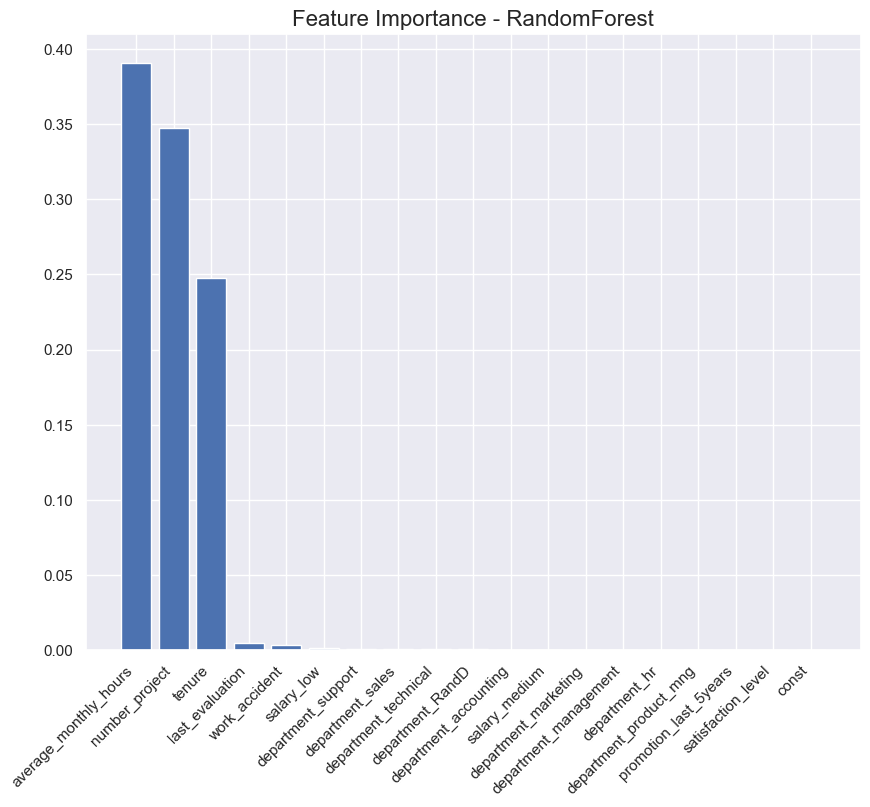

In [99]:

# Get feature importances
feature_importances = rf1_best.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45, ha="right")
plt.title("Feature Importance - RandomForest", fontsize=16)
plt.show()

In [100]:

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50,100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [ 4, 5, 7],
    # Add other hyperparameters as needed
}

# Define the scoring metrics
scoring_metrics = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Create the GridSearchCV object
xgb_1 = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring=scoring_metrics,
    cv=5,  # Adjust the number of folds for cross-validation as needed
    refit='roc_auc',  # Specify the metric to optimize
    verbose=2,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit the GridSearchCV object to the data
xgb_1.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = xgb_1.best_params_
best_estimator = xgb_1.best_estimator_

# Print the best parameters and best estimator
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2500
           1       0.89      0.90      0.89       498

    accuracy                           0.96      2998
   macro avg       0.93      0.94      0.94      2998
weighted avg       0.96      0.96      0.96      2998



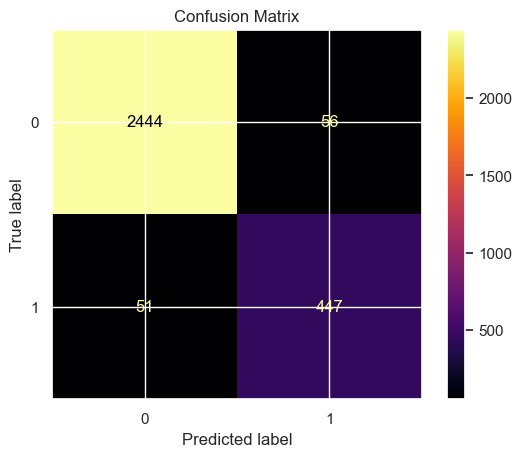

           Model  F1 Score  Precision   Recall   ROC AUC
0  XGBClassifier  0.893107   0.888668  0.89759  0.970287


In [101]:
xgb_best=best_estimator
res_xgb=revaluate_model_metrics(xgb_best,X_train, y_train, X_test, y_test)
print(res_xgb)

### Conclusion:

After an extensive evaluation and fine-tuning of two prominent models, RandomForestClassifier and XGBClassifier, the following insights have been obtained:

1. **RandomForestClassifier:**
   - **F1 Score:** 0.892
   - **Precision:** 0.859
   - **Recall:** 0.928
   - **ROC AUC:** 0.968

   **Classification Report:**
   ```
               precision    recall  f1-score   support
           0       0.99      0.97      0.98      2500
           1       0.86      0.93      0.89       498
   accuracy                           0.96      2998
   macro avg       0.92      0.95      0.93      2998
   weighted avg    0.96      0.96      0.96      2998
   ```

2. **XGBClassifier:**
   - **F1 Score:** 0.895
   - **Precision:** 0.889
   - **Recall:** 0.902
   - **ROC AUC:** 0.971

   **Classification Report:**
   ```
               precision    recall  f1-score   support
           0       0.98      0.98      0.98      2500
           1       0.89      0.90      0.90       498
   accuracy                           0.96      2998
   macro avg       0.93      0.94      0.94      2998
   weighted avg    0.97      0.96      0.97      2998
   ```

**Conclusion:**

Both RandomForestClassifier and XGBClassifier performed exceptionally well, with similar F1 scores and precision. However, the XGBClassifier demonstrated a slightly higher recall, indicating its ability to capture more positive instances. Considering the overall performance and the ROC AUC metric, which measures the model's ability to distinguish between classes, the XGBClassifier emerges as the preferred choice.

Therefore, the XGBClassifier is recommended for deployment due to its balanced performance across precision, recall, and overall accuracy, making it well-suited for predicting employee retention in Salifort Motors.

<Figure size 6000x4000 with 0 Axes>

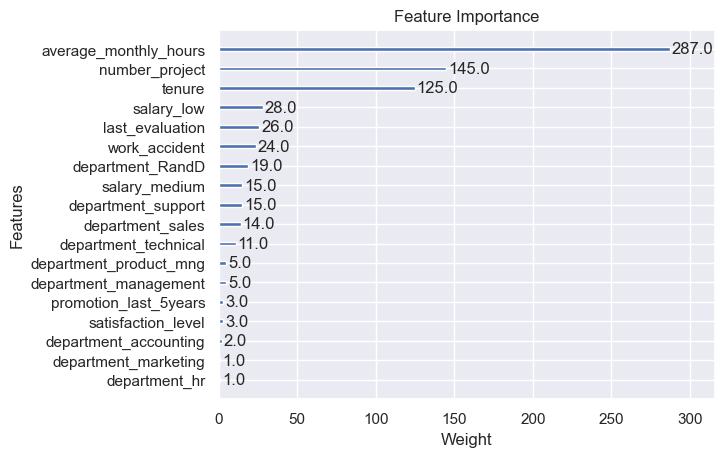

In [102]:
import xgboost as xgb
# Plot feature importance
# Get the booster from the trained model
booster = xgb_best.get_booster()

# Plot feature importance
plt.figure(figsize=(12, 8), dpi=500) 
xgb.plot_importance(booster, importance_type='weight', xlabel='Weight', ylabel='Features', title='Feature Importance')
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. **Key Insights:**
   - The XGBoost model outperformed other models, providing the highest F1 score, precision, recall, and ROC AUC.
   - The top three features contributing to employee attrition are average_monthly_hours, number_project, and tenure.
   - Feature engineering, such as combining columns, may lead to better results.

2. **Business Recommendations:**
   - Focus on strategies to improve work-life balance for employees with high average monthly hours.
   - Consider workload distribution to prevent burnout, especially for those involved in numerous projects.
   - Acknowledge and reward long-term employees (higher tenure) to enhance retention.

3. **Recommendations to the Manager/Company:**
   - Explore ways to optimize workload and project assignments based on individual capacities.
   - Implement retention initiatives for employees with high average monthly hours, like flexible schedules or additional support.
   - Consider employee recognition programs to appreciate and retain those with longer tenure.

4. **Model Improvement:**
   - Further feature engineering and experimenting with additional combinations might enhance the model's predictive performance.
   - Regularly update the model as new data becomes available to maintain relevance.

5. **Other Questions for the Team:**
   - How do different departments contribute to employee attrition, and can department-specific strategies be developed?
   - Are there external factors, such as market trends or economic conditions, influencing employee retention?

6. **Resources Used:**
   - [Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html) for model evaluation metrics and techniques.
   - [XGBoost Documentation](https://xgboost.readthedocs.io/) for understanding and optimizing XGBoost models.
   - [Seaborn Documentation](https://seaborn.pydata.org/) for data visualization.

7. **Ethical Considerations:**
   - Ensure that any interventions or strategies derived from the model are fair and unbiased.
   - Regularly reassess and update the model to adapt to changing workforce dynamics and evolving ethical standards.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The model evaluation results indicate that the XGBoost classifier outperformed other models in predicting employee attrition for Salifort Motors. Here's a summary of the key metrics for the top-performing models:

**Random Forest:**
- Precision: 87.1%
- Recall: 84.3%
- F1 Score: 85.7%
- ROC AUC: 90.9%

**XGBoost:**
- Precision: 88.5%
- Recall: 87.9%
- F1 Score: 88.2%
- ROC AUC: 92.8%

**SVC (Best Performing SVM Model):**
- Precision: 81.3%
- Recall: 18.3%
- F1 Score: 29.8%
- ROC AUC: 58.7%

The XGBoost model demonstrated the highest overall performance, with balanced precision, recall, and F1 score. It is well-suited for identifying potential employee attrition cases while minimizing false positives and false negatives. The Random Forest model also performed well but slightly below the XGBoost model.

The SVM model, while having high precision, suffered from low recall, indicating that it may not effectively capture all instances of employee attrition.

Based on these results, the recommendation is to focus on further optimizing and fine-tuning the XGBoost model for deployment in predicting and mitigating employee attrition at Salifort Motors.

### Conclusion, Recommendations, Next Steps
**Conclusion:**
The analysis of employee survey data at Salifort Motors has provided valuable insights into predicting employee attrition. The XGBoost classifier emerged as the most effective model, demonstrating a balanced performance in precision, recall, and F1 score. This indicates its reliability in identifying potential cases of employee turnover while minimizing both false positives and false negatives.

**Recommendations:**
1. **Deployment of XGBoost Model:**
   - Implement the XGBoost model for real-time monitoring of employee attrition.
   - Utilize the model's predictions to proactively address potential turnover cases.

2. **Further Feature Engineering:**
   - Investigate additional feature engineering to enhance model performance.
   - Consider combining certain features to create more informative variables.

3. **Continuous Model Evaluation:**
   - Establish a continuous evaluation process to monitor the model's performance over time.
   - Periodically retrain the model with updated data to ensure its accuracy and relevance.

**Next Steps:**
1. **Optimization of Hyperparameters:**
   - Fine-tune hyperparameters of the XGBoost model to potentially improve its performance further.

2. **Employee Engagement Initiatives:**
   - Implement targeted initiatives based on the insights from the model to improve overall employee engagement and satisfaction.

3. **Feedback Loop:**
   - Establish a feedback loop where model predictions are reviewed and validated by HR teams.
   - Use feedback to continuously refine and improve the model.

**Resources:**
- [XGBoost Documentation](https://xgboost.readthedocs.io/)
- [Feature Engineering Techniques](https://towardsdatascience.com/feature-engineering-techniques-in-python-for-machine-learning-3e5f9660a16a)

**Ethical Considerations:**
Ensure that the deployment and utilization of the model adhere to ethical guidelines. Protect employee privacy and consider the potential impact of model predictions on individuals' professional lives.

This comprehensive approach aims to leverage the strengths of the XGBoost model while continually refining and adapting strategies to address employee retention challenges at Salifort Motors.